In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 📌 Cargar los datos
data = pd.read_csv('../data/processed/weather_classification_data.csv')

# 📌 Aplicar One-Hot Encoding en 'location'
categorical_columns = ['cloud_cover', 'season', 'weather_type', 'location']
data = pd.get_dummies(data, columns=categorical_columns)

# 📌 Seleccionar features dinámicamente después de get_dummies()
features = ['temperature', 'humidity', 'wind_speed', 'atmospheric_pressure', 
            'uv_index', 'visibility_(km)'] + list(data.filter(like='location_').columns)

# 📌 Separar features y target
target = 'precipitation_(%)'
X = data[features]
y = data[target]

# 📌 Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Escalar los datos (opcional, pero recomendable)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Entrenar RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📌 Hacer predicciones
y_pred = model.predict(X_test)

# 📌 Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


Mean Squared Error: 232.38
R² Score: 0.77


precipitation_(%)            1.000000
humidity                     0.638631
wind_speed                   0.443770
cloud_cover_overcast         0.403088
weather_type_Rainy           0.381487
weather_type_Snowy           0.378480
season_Winter                0.247196
location_inland              0.059336
location_mountain            0.045888
cloud_cover_cloudy          -0.001964
cloud_cover_partly cloudy   -0.091756
season_Summer               -0.098157
season_Autumn               -0.099665
season_Spring               -0.112516
location_coastal            -0.114017
atmospheric_pressure        -0.177444
weather_type_Cloudy         -0.241421
temperature                 -0.287206
uv_index                    -0.291601
cloud_cover_clear           -0.425976
visibility_(km)             -0.457444
weather_type_Sunny          -0.518547
Name: precipitation_(%), dtype: float64


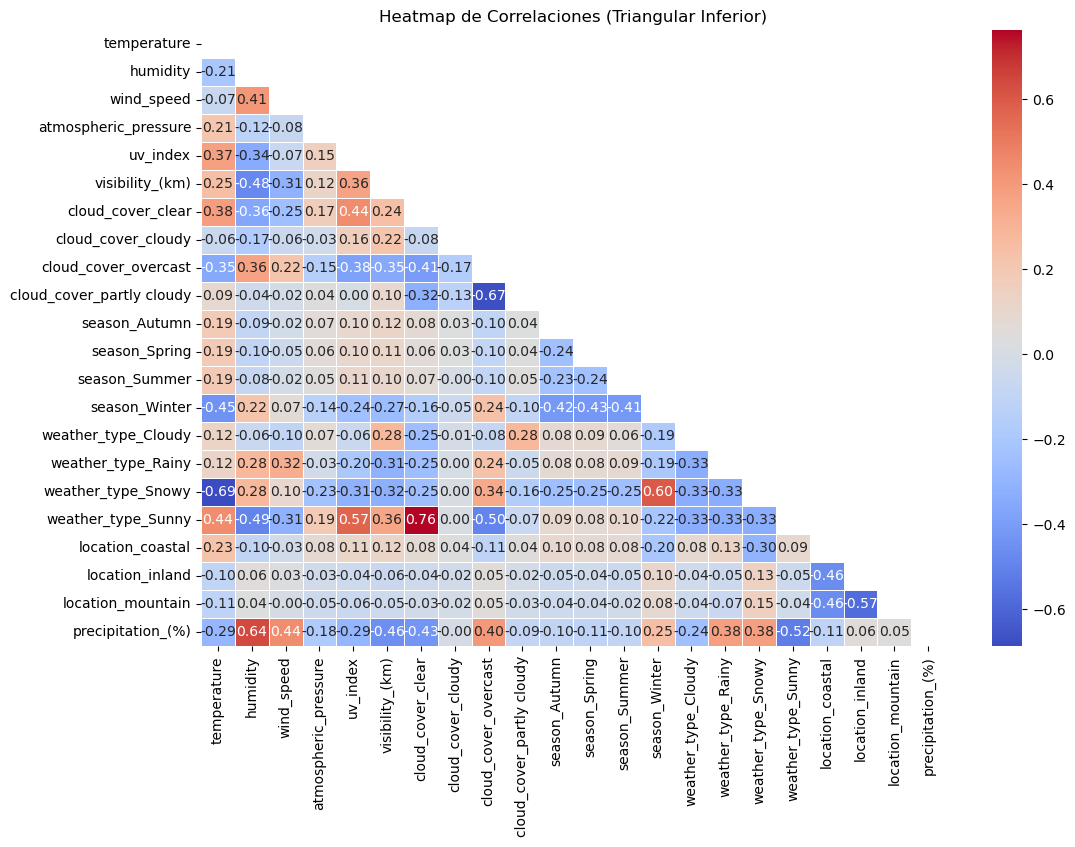

In [9]:
# 📌 Calcular la correlación
correlation = data.corr()

# 📌 Mostrar la correlación ordenada de la variable objetivo
print(correlation[target].sort_values(ascending=False))

# 📌 Reordenar las columnas para que el target esté al final
columns = [col for col in correlation.columns if col != target] + [target]
correlation = correlation[columns].loc[columns]

# 📌 Crear una máscara para mostrar solo la diagonal inferior
mask = np.triu(np.ones_like(correlation, dtype=bool))

# 📌 Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# 📌 Generar el heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, linewidths=0.5)

# 📌 Configurar título
plt.title('Heatmap de Correlaciones (Triangular Inferior)')

# 📌 Mostrar gráfico
plt.show()


## 🔹 Conclusiones Finales

1️⃣ **Uso de One-Hot Encoding en `location`**  
   - Se aplicó `pd.get_dummies(data, columns=['location'])` porque `location` es categórica pero no tiene un orden jerárquico.
   - Esto evita que el modelo interprete una relación incorrecta entre ubicaciones.

2️⃣ **Selección de características basada en datos reales**  
   - Se excluyeron `weather_type`, `season` y `cloud_cover` para hacer que el modelo aprenda únicamente a partir de variables meteorológicas medibles.
   - Esto permite que el modelo sea más útil en escenarios reales donde queremos predecir la lluvia sin depender de etiquetas climáticas.

3️⃣ **Modelo de `RandomForestRegressor` optimizado**  
   - Se dividió el dataset en entrenamiento y prueba con `train_test_split()`.
   - Se aplicó `StandardScaler()` para mejorar la estabilidad del modelo (aunque los árboles no lo necesitan estrictamente).
   - Se entrenó y evaluó el modelo con `mean_squared_error` y `r2_score` para medir su rendimiento.
